## EXPLORATORY DATA ANALYSIS (EDA)

### .... And what the hell is Churn?
>Churn happens when customers leave their current service provider and move to another one. This is a big business problem because it is more expensive to acquire a new customer than to keep an existing one from leaving. 

>This is an academic data that can be analyzed to help us classify potential customers who might churn. 

> I have divided this job into three parts:
       1. EDA (Exploratory Data Analysis) 
       2. FE (Feature Engineering)
       3. MLM (Machine Learning Model)
This notebook deals with EDA

### Import Relevant Python Packages

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import norm, skew # for little statistics

import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn   #ignore warnings from sklearn and seaborn

In [132]:
#Ingest and read data with pandas
#and read first 5 rows of the data

data = pd.read_csv('./dsntelecomschurn2018/TRAIN.csv')
data.head()

,Customer ID,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Network type subscription in Month 1,Network type subscription in Month 2,Most Loved Competitor network in in Month 1,Most Loved Competitor network in in Month 2,Churn Status
0,ADF0039,123,4.10,76.7140,0.00,1.25,1.4951,14,564,6408,2,2G,2G,Uxaa,Mango,0
1,ADF0041,1316,43.87,98.8904,4.14,1.25,1.0244,27,1626,4373,1,2G,2G,Uxaa,Mango,0
2,ADF0051,2385,79.50,372.6300,3.51,1.25,6.0898,119,10411,22039,1,2G,2G,Weematel,Mango,0
3,ADF0059,1614,53.80,530.2000,6.85,1.25,3.3447,69,6822,6274,1,2G,2G,0,Mango,0
4,ADF0060,2175,72.50,554.1300,6.99,153.75,673204.0342,33,3387,7241,1,2G,3G,Weematel,Mango,0


### Data fields
> Total Spend in Months 1 and 2 of 2017: The total spend of a customer in the months July & August 2017.

> Total SMS Spend: The total spend on SMS by a customer revenue earned through the SMS service used by the subscriber.

> Total Data Spend: The total amount spend on Data/Internet by a customer revenue earned through the SMS service used by the subscriber.

> Total Data Consumption : The total data consumed by a subscriber in KB over the period under study

> Total Unique Calls: The total count of unique calls made by a subscriber during the period under review

> Total Onnet spend: The total spend of a customer to make on-network calls (on the same network as the subscriber)

> Total Offnet spend: Aggregate of Off Net Revenue: The total spend of a customer to make off-network calls (not the same network as the subscriber)

> Customer Tenure in Months: The time passed since the subscriber started using the services of the network provider and counted in months

> Network type subscription in Month 1: This indicates preferred network subscription of a customer, which may indicate their type of device - 2G or 3G service.

> Network type subscription in Month 2: This indicates preferred network subscription of a customer, which may indicate their type of device - 2G or 3G service in the month after.

> Total Call centre complaint calls: The number of complaints made by the subscribers.

> Most Loved Competitor network in in Month 1: This information certainly have a huge impact on as it gives the information about which other service provider prefer and may likely move to

> Most Loved Competitor network in in Month 2: This information certainly have a huge impact on as it gives the information about which other service provider prefer and may likely move to

> Churn Status: This is an indicator of a customer who leaves the network or not. 1 means the customer has churned and 0 means no churn.

In [133]:
#I transposed the train.head() command because I wanted to see all rows and columns on a single page without 
#scrolling horizontally

data.head().transpose()

,0,1,2,3,4
Customer ID,ADF0039,ADF0041,ADF0051,ADF0059,ADF0060
network_age,123,1316,2385,1614,2175
Customer tenure in month,4.1,43.87,79.5,53.8,72.5
Total Spend in Months 1 and 2 of 2017,76.714,98.8904,372.63,530.2,554.13
Total SMS Spend,0,4.14,3.51,6.85,6.99
Total Data Spend,1.25,1.25,1.25,1.25,153.75
Total Data Consumption,1.4951,1.0244,6.0898,3.3447,673204
Total Unique Calls,14,27,119,69,33
Total Onnet spend,564,1626,10411,6822,3387
Total Offnet spend,6408,4373,22039,6274,7241


In [134]:
col = data.columns
print(data.shape)
print(col)
print(data.dtypes)

(1400, 16)
Index(['Customer ID', 'network_age', 'Customer tenure in month',
       'Total Spend in Months 1 and 2 of 2017', 'Total SMS Spend',
       'Total Data Spend', 'Total Data Consumption', 'Total Unique Calls',
       'Total Onnet spend ', 'Total Offnet spend',
       'Total Call centre complaint calls',
       'Network type subscription in Month 1',
       'Network type subscription in Month 2',
       'Most Loved Competitor network in in Month 1',
       'Most Loved Competitor network in in Month 2', 'Churn Status'],
      dtype='object')
Customer ID                                     object
network_age                                      int64
Customer tenure in month                       float64
Total Spend in Months 1 and 2 of 2017          float64
Total SMS Spend                                float64
Total Data Spend                               float64
Total Data Consumption                         float64
Total Unique Calls                               int64
Total 

In [136]:
#Lets check for missing values in terms of percentage 
missing_values = (data.isnull().sum()/len(data))*100
#print(missing_values[missing_values > 0])
missing_values = missing_values.drop(missing_values[missing_values == 0].index).sort_values(ascending=False)
missing_values = pd.DataFrame({'Percentage' : missing_values})
missing_values

,Percentage
Network type subscription in Month 1,12.500000
Network type subscription in Month 2,10.285714
Most Loved Competitor network in in Month 2,0.071429
Most Loved Competitor network in in Month 1,0.071429


### Honestly at this level, I feel Network type subscriptions is not feature 
I waana deal with. I am dropping it in my feature selection

In [97]:
#so I am gonna drop them here and then do imputation for others
data = data.drop(['Network type subscription in Month 1', 'Network type subscription in Month 2'], axis = 1)
print(data.shape)

(1400, 14)


In [137]:
#Lets check for missing values again
#Now those ones have been dropped
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

Network type subscription in Month 1           175
Network type subscription in Month 2           144
Most Loved Competitor network in in Month 1      1
Most Loved Competitor network in in Month 2      1
dtype: int64


In [138]:
#Lets drop these missing values
data = data.dropna()
data.shape

(1202, 16)

In [139]:
print(missing_values[missing_values > 0])

Network type subscription in Month 1           175
Network type subscription in Month 2           144
Most Loved Competitor network in in Month 1      1
Most Loved Competitor network in in Month 2      1
dtype: int64


In [140]:
#from sklearn.impute import SimpleImputer doesn not work bcos Imputer package is not in 0.19.0 of sklearn
#it's supported only in 0.20.dev0.
#print(sklearn.__version__)
from sklearn.preprocessing import Imputer

my_imputer = Imputer()
#imputed_data = my_imputer.fit_transform(data)

In [141]:
 # so here are my categorical features
cat_fatures = data.select_dtypes('object')
cat_fatures.head()

,Customer ID,Network type subscription in Month 1,Network type subscription in Month 2,Most Loved Competitor network in in Month 1,Most Loved Competitor network in in Month 2
0,ADF0039,2G,2G,Uxaa,Mango
1,ADF0041,2G,2G,Uxaa,Mango
2,ADF0051,2G,2G,Weematel,Mango
3,ADF0059,2G,2G,0,Mango
4,ADF0060,2G,3G,Weematel,Mango


In [142]:
 # so here are my numerical features
num_fatures = data.select_dtypes(exclude=['object'])
num_fatures.head()

,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Churn Status
0,123,4.10,76.7140,0.00,1.25,1.4951,14,564,6408,2,0
1,1316,43.87,98.8904,4.14,1.25,1.0244,27,1626,4373,1,0
2,2385,79.50,372.6300,3.51,1.25,6.0898,119,10411,22039,1,0
3,1614,53.80,530.2000,6.85,1.25,3.3447,69,6822,6274,1,0
4,2175,72.50,554.1300,6.99,153.75,673204.0342,33,3387,7241,1,0


### Now I am starting EDA proper

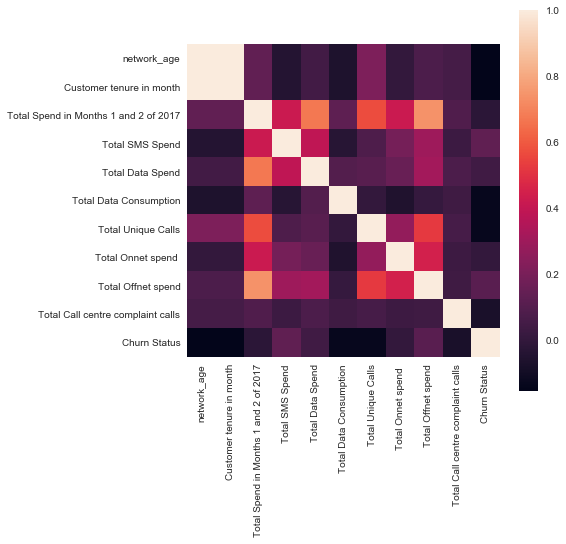

In [143]:
#find correlation among features

corrmat = data.corr()
f, ax = plt.subplots(figsize=(7,7))
sns.heatmap(corrmat, square=True)

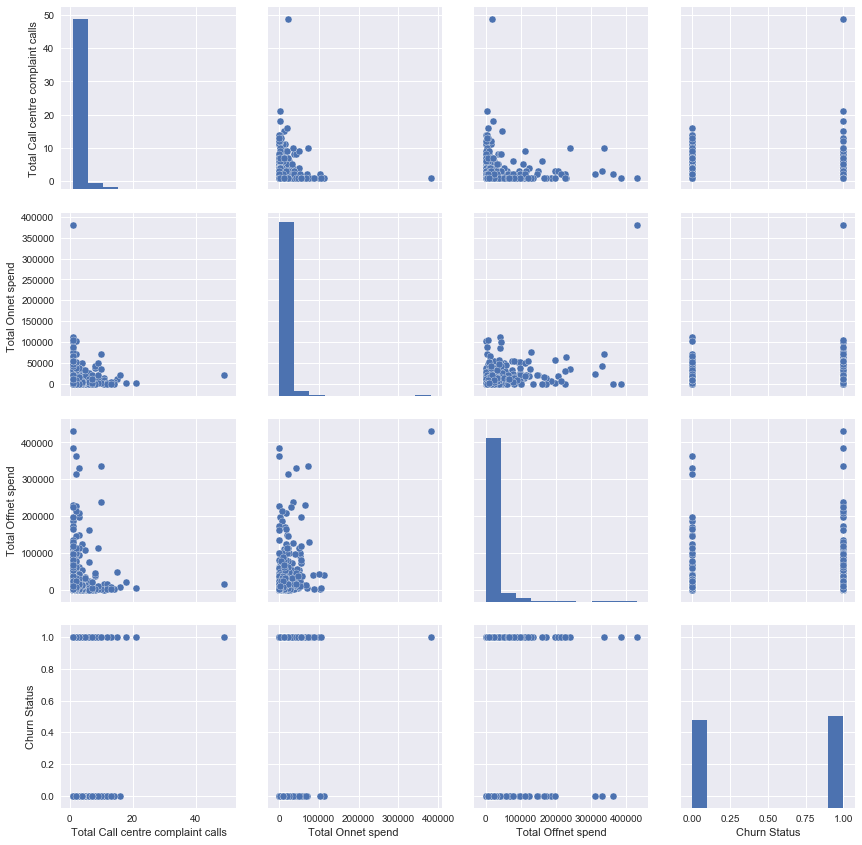

In [144]:
#Lets do some pairplot

cols = ['Total Call centre complaint calls', 'Total Onnet spend ','Total Offnet spend', 'Churn Status']
sns.pairplot(data[cols], size=3.0)


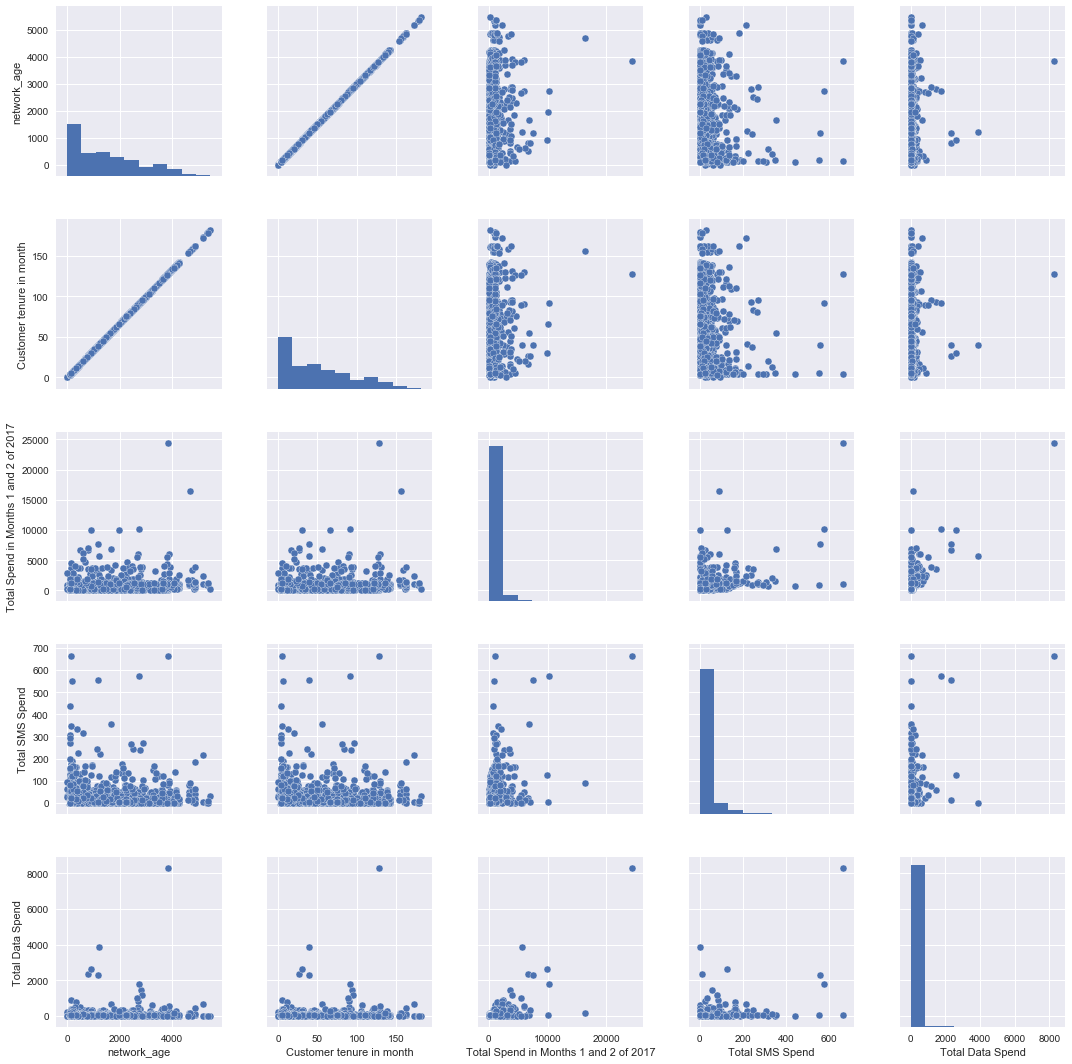

In [145]:
cols = ['network_age', 'Customer tenure in month',
       'Total Spend in Months 1 and 2 of 2017', 'Total SMS Spend',
       'Total Data Spend']
sns.pairplot(data[cols], size=3.0)